# Exploraty Data Analysis

In [867]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


### Load Dataset from "gendered_data.ipynb"

Load the dataset into a pandas DataFrame then display the first few rows of the DataFrame to get an initial look at the data.


In [868]:
# Load the dataset
df = pd.read_csv('gendered_data.csv')

# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,seniority,desc_len,num_comp,headquarters_state,Lemmatized_Description,Agentic_Words,Communal_Words,Agentic_Count,Communal_Count,Gendered_Ratio
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,na,2536,0,CA,"Data Scientist Location : Albuquerque , NM Edu...",Required required Required proficient strong a...,team Generous our Our our our our our,16,8,2.000000
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,na,4783,0,MD,What You Will Do : I . General Summary The Hea...,Advanced strategic computational essential ana...,our support support team our team our support,23,8,2.875000
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,na,3461,0,FL,"KnowBe4 , Inc. is a high growth information se...",high Quantitative advanced unstructured extern...,our our team support understanding,12,5,2.400000
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,na,3883,3,WA,* Organization and Job ID * * Job ID : 310709 ...,computational advanced computational driving c...,Team understanding collaborative diverse inclu...,15,9,1.666667
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,na,2728,3,NY,Data Scientist Affinity Solutions / Marketing ...,innovative appropriate Advanced advanced keen ...,our team team our our our Support support supp...,9,10,0.900000


In [869]:
# Additional dataset information
print('Data Set Info')
print(df.info())


Data Set Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              742 non-null    int64  
 1   Job Title               742 non-null    object 
 2   Salary Estimate         742 non-null    object 
 3   Job Description         742 non-null    object 
 4   Rating                  742 non-null    float64
 5   Company Name            742 non-null    object 
 6   Location                742 non-null    object 
 7   Headquarters            742 non-null    object 
 8   Size                    742 non-null    object 
 9   Founded                 742 non-null    int64  
 10  Type of ownership       742 non-null    object 
 11  Industry                742 non-null    object 
 12  Sector                  742 non-null    object 
 13  Revenue                 742 non-null    object 
 14  Competitors             742 

In [870]:
# Describe the dataset
print("\nDescribe Data Set")
print(df.describe(include='all'))



Describe Data Set
        Unnamed: 0       Job Title              Salary Estimate  \
count   742.000000             742                          742   
unique         NaN             264                          416   
top            NaN  Data Scientist  $49K-$113K (Glassdoor est.)   
freq           NaN             131                            6   
mean    370.500000             NaN                          NaN   
std     214.341239             NaN                          NaN   
min       0.000000             NaN                          NaN   
25%     185.250000             NaN                          NaN   
50%     370.500000             NaN                          NaN   
75%     555.750000             NaN                          NaN   
max     741.000000             NaN                          NaN   

                                          Job Description      Rating  \
count                                                 742  742.000000   
unique                        

In [871]:
# Get unique values count for each column
print("\nUnique Values:")
print('Nunique: Counts number of distinct elements in specified axis. Returns Series with number of distinct elements')
print(df.nunique())




Unique Values:
Nunique: Counts number of distinct elements in specified axis. Returns Series with number of distinct elements
Unnamed: 0                742
Job Title                 264
Salary Estimate           416
Job Description           463
Rating                     31
Company Name              343
Location                  200
Headquarters              198
Size                        9
Founded                   102
Type of ownership          11
Industry                   60
Sector                     25
Revenue                    14
Competitors               128
hourly                      2
employer_provided           2
min_salary                114
max_salary                160
avg_salary                225
company_txt               343
job_state                  37
same_state                  2
age                       102
python_yn                   2
R_yn                        2
spark                       2
aws                         2
excel                       2
job

In [872]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0                0
Job Title                 0
Salary Estimate           0
Job Description           0
Rating                    0
Company Name              0
Location                  0
Headquarters              0
Size                      0
Founded                   0
Type of ownership         0
Industry                  0
Sector                    0
Revenue                   0
Competitors               0
hourly                    0
employer_provided         0
min_salary                0
max_salary                0
avg_salary                0
company_txt               0
job_state                 0
same_state                0
age                       0
python_yn                 0
R_yn                      0
spark                     0
aws                       0
excel                     0
job_simp                  0
seniority                 0
desc_len                  0
num_comp                  0
headquarters_state        0
Lemmatized_Description    0
Age

### Distribution of Categorical Features

This cell visualizes the distribution of each categorical feature using count plots. These plots help to understand the frequency of different categories within each feature.


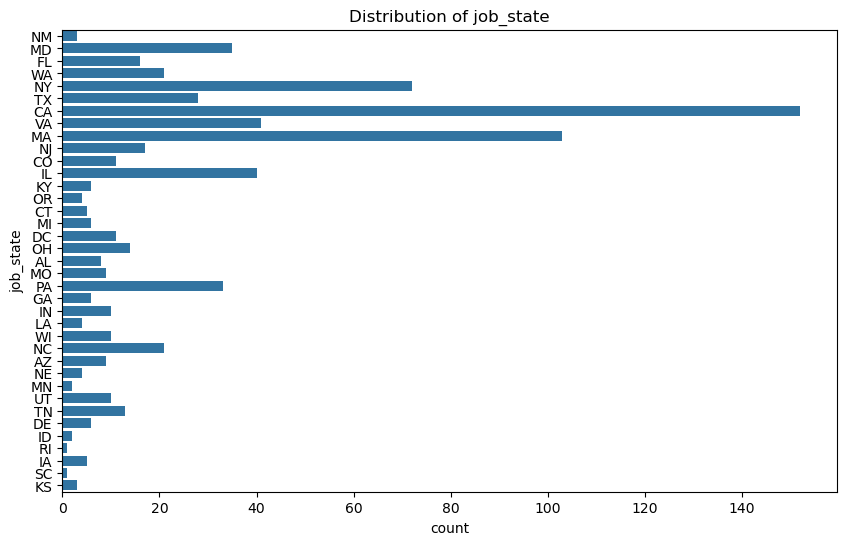

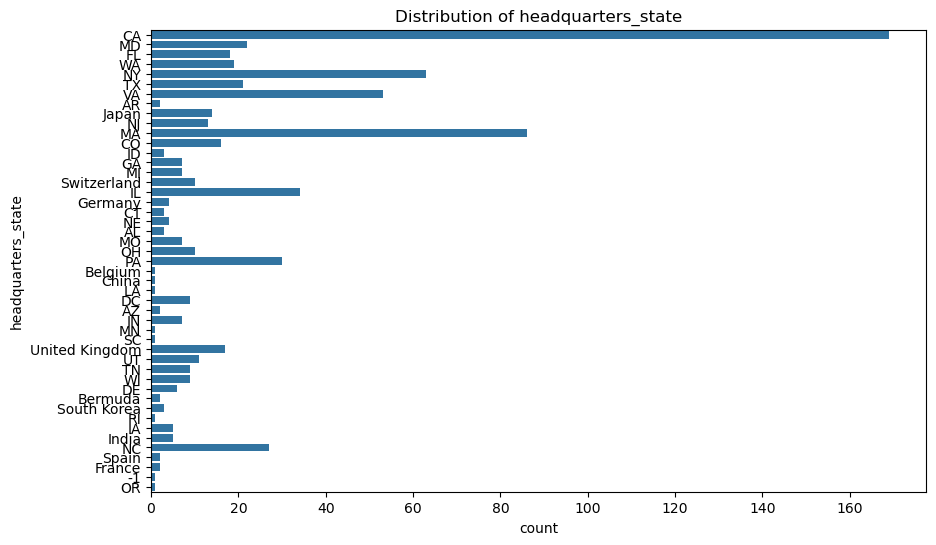

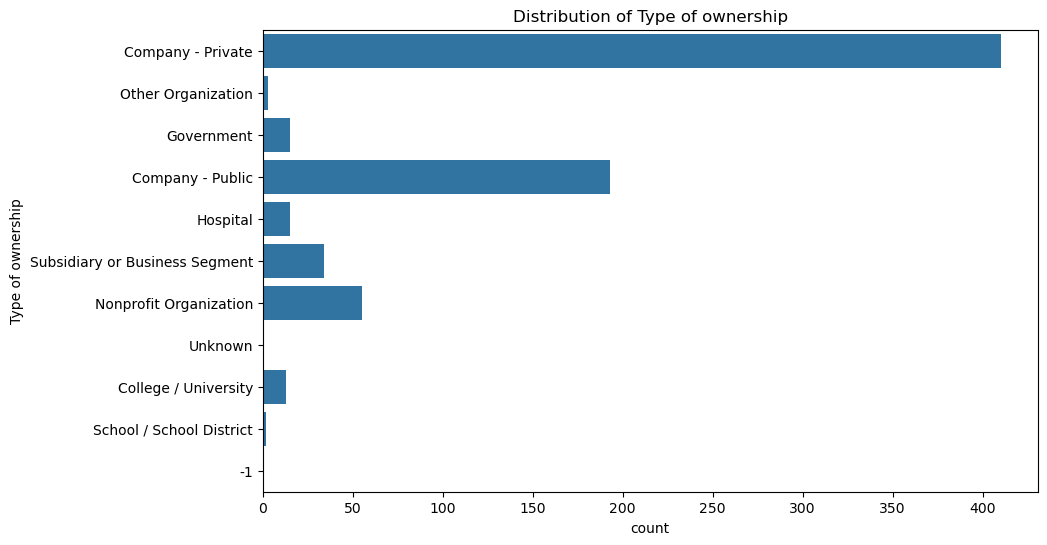

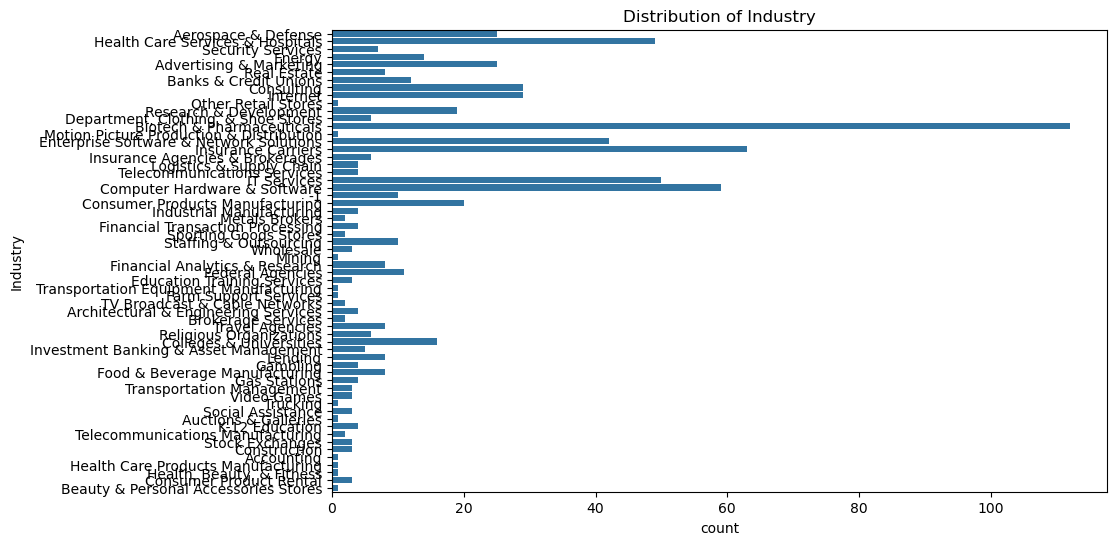

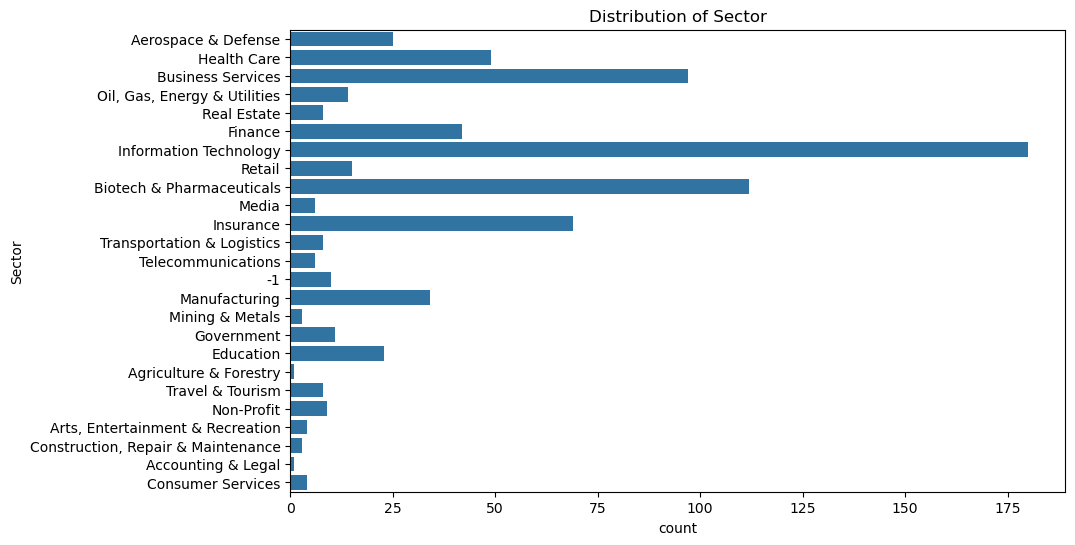

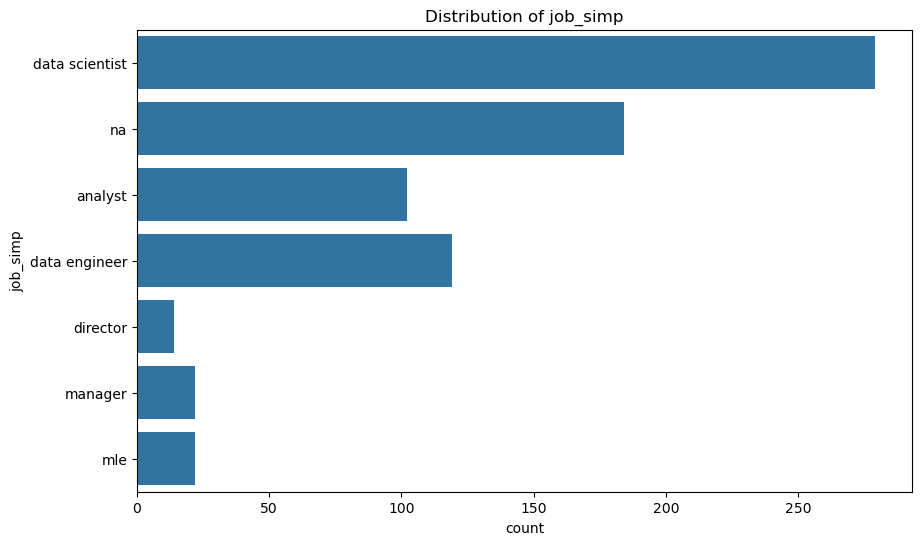

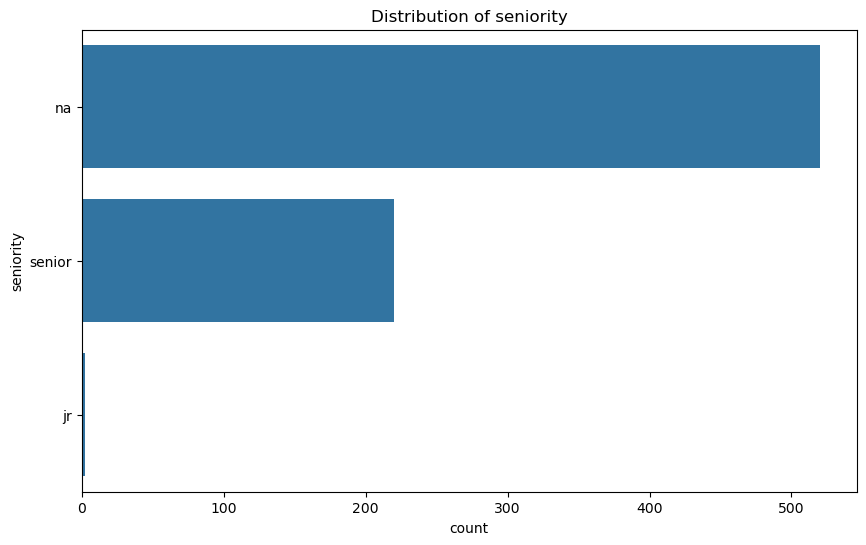

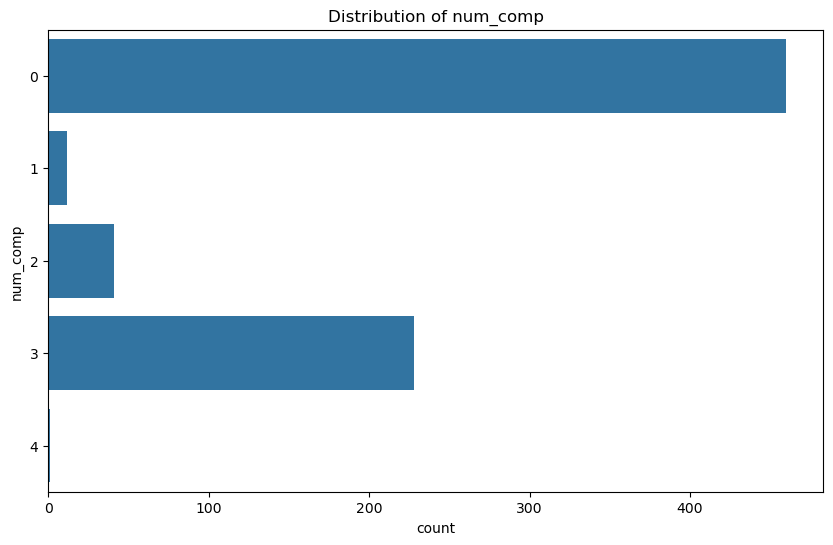

In [873]:
# List of categorical features to analyze
categorical_features = [
#    'num_comp','Type of ownership','Industry', 'Sector', 'Size', 'location_state','headquarters_state', 'job_simp', 'seniority']
'job_state','headquarters_state', 'Type of ownership', 'Industry', 'Sector', 'job_simp', 'seniority', 'num_comp'
]

# Plot distribution of each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()



### Summarizes/Combines All Categorical Distributions

/var/folders/fj/6115v37x4dz0tt41cflnv2cm0000gn/T/ipykernel_73036/1076037163.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df, ax=axes[i], palette="viridis", orient='h')
/var/folders/fj/6115v37x4dz0tt41cflnv2cm0000gn/T/ipykernel_73036/1076037163.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=12, rotation=0, ha='right')
/var/folders/fj/6115v37x4dz0tt41cflnv2cm0000gn/T/ipykernel_73036/1076037163.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df, ax=axes[i], palette="viridis", orient='h')
/var/fold

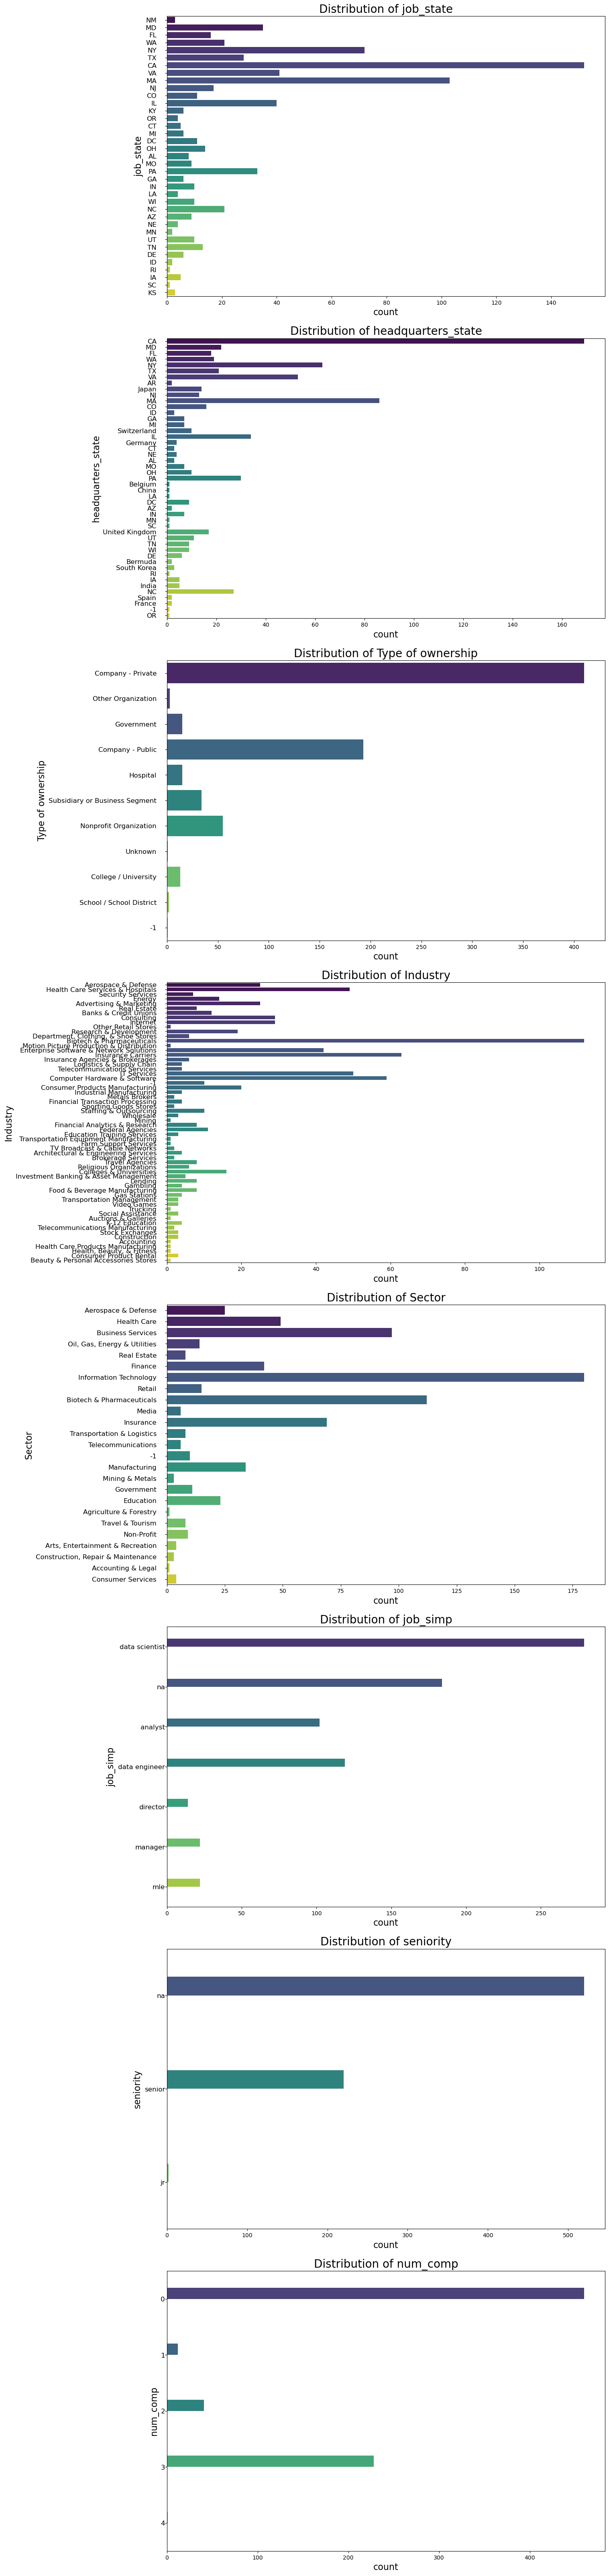

In [874]:
# List of categorical features to analyze
categorical_features = [
    'job_state', 'headquarters_state', 'Type of ownership', 'Industry', 'Sector', 'job_simp', 'seniority', 'num_comp'
]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(15, 8 * len(categorical_features)))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot distribution of each categorical feature
for i, feature in enumerate(categorical_features):
    n_unique = df[feature].nunique()
    
    if n_unique < 10:
        # Adjust size for fewer unique values
        sns.countplot(y=feature, data=df, ax=axes[i], palette="viridis", orient='h', width=0.4)
        axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=12, rotation=0, ha='right')
        axes[i].yaxis.set_tick_params(pad=0)  # Add padding between y-axis labels and ticks
        # Adjust spacing between bars
        for patch in axes[i].patches:
            patch.set_height(0.2)  # Decrease bar height
        axes[i].set_title(f'Distribution of {feature}', fontsize=20)
        axes[i].set_xlabel(axes[i].get_xlabel(), fontsize=16)
        axes[i].set_ylabel(axes[i].get_ylabel(), fontsize=16)
        fig.tight_layout(pad=0.1)
    else:
        # Adjust size for more unique values
        sns.countplot(y=feature, data=df, ax=axes[i], palette="viridis", orient='h')
        axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=12, rotation=0, ha='right')
        axes[i].yaxis.set_tick_params(pad=15)  # Increase padding between y-axis labels and ticks
        # Increase spacing between bars
        for patch in axes[i].patches:
            patch.set_height(0.8)  # Increase bar height
        axes[i].set_title(f'Distribution of {feature}', fontsize=20)
        axes[i].set_xlabel(axes[i].get_xlabel(), fontsize=16)
        axes[i].set_ylabel(axes[i].get_ylabel(), fontsize=16)
        fig.tight_layout(pad=.8)

# Adjust layout to avoid overlap and reduce white space
plt.subplots_adjust(hspace=0.15)  # Increase space between subplots

# Save the figure as a .png file
plt.savefig('categorical_features_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [875]:
# List of categorical features to analyze
categorical_features = [
    'job_state', 'headquarters_state', 'Type of ownership', 'Industry', 'Sector', 'job_simp', 'seniority', 'num_comp'
]

# Separate features based on the number of unique values
features_few_unique = [feature for feature in categorical_features if df[feature].nunique() < 12]
features_many_unique = [feature for feature in categorical_features if df[feature].nunique() >= 12]

# Function to create and save plots for a given list of features with one column
def plot_categorical_features(features, filename):
    n_features = len(features)
    ncols = 1
    nrows = n_features  # Each feature gets its own row
    
    # Determine figsize based on the number of unique values
    if features[0] in features_few_unique:
        figsize = (15, 6 * nrows)  # For features with fewer unique values
    else:
        figsize = (15, 12 * nrows)  # For features with more unique values

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()

    for i, feature in enumerate(features):
        n_unique = df[feature].nunique()
        
        if n_unique < 12:
            sns.countplot(y=feature, data=df, ax=axes[i], palette="viridis", orient='h', width=0.4)
            axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=12, rotation=0, ha='right')
            axes[i].yaxis.set_tick_params(pad=0.2)  # Add padding between y-axis labels and ticks
            for patch in axes[i].patches:
                patch.set_height(0.2)  # Decrease bar height
        else:
            sns.countplot(y=feature, data=df, ax=axes[i], palette="viridis", orient='h')
            axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=12, rotation=0, ha='right')
            axes[i].yaxis.set_tick_params(pad=20)  # Increase padding between y-axis labels and ticks
            for patch in axes[i].patches:
                patch.set_height(0.8)  # Increase bar height
        axes[i].set_title(f'Distribution of {feature}', fontsize=20)
        axes[i].set_xlabel(axes[i].get_xlabel(), fontsize=16)
        axes[i].set_ylabel(axes[i].get_ylabel(), fontsize=16)

    # Turn off unused subplots if there are fewer features than subplots
    if len(features) < len(axes):
        for j in range(len(features), len(axes)):
            fig.delaxes(axes[j])

    # Adjust layout to avoid overlap and reduce white space
    plt.subplots_adjust(hspace=0.2)  # Adjust space between subplots
    
    # Save the figure as a .png file
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

# Plot and save the figures with one column
plot_categorical_features(features_few_unique, 'cat_dist_few.png')
plot_categorical_features(features_many_unique, 'cat_dist_many.png')


/var/folders/fj/6115v37x4dz0tt41cflnv2cm0000gn/T/ipykernel_73036/3018008193.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df, ax=axes[i], palette="viridis", orient='h', width=0.4)
/var/folders/fj/6115v37x4dz0tt41cflnv2cm0000gn/T/ipykernel_73036/3018008193.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=12, rotation=0, ha='right')
/var/folders/fj/6115v37x4dz0tt41cflnv2cm0000gn/T/ipykernel_73036/3018008193.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df, ax=axes[i], palette="viridis", orient='h'

### Distribution of Binary Features

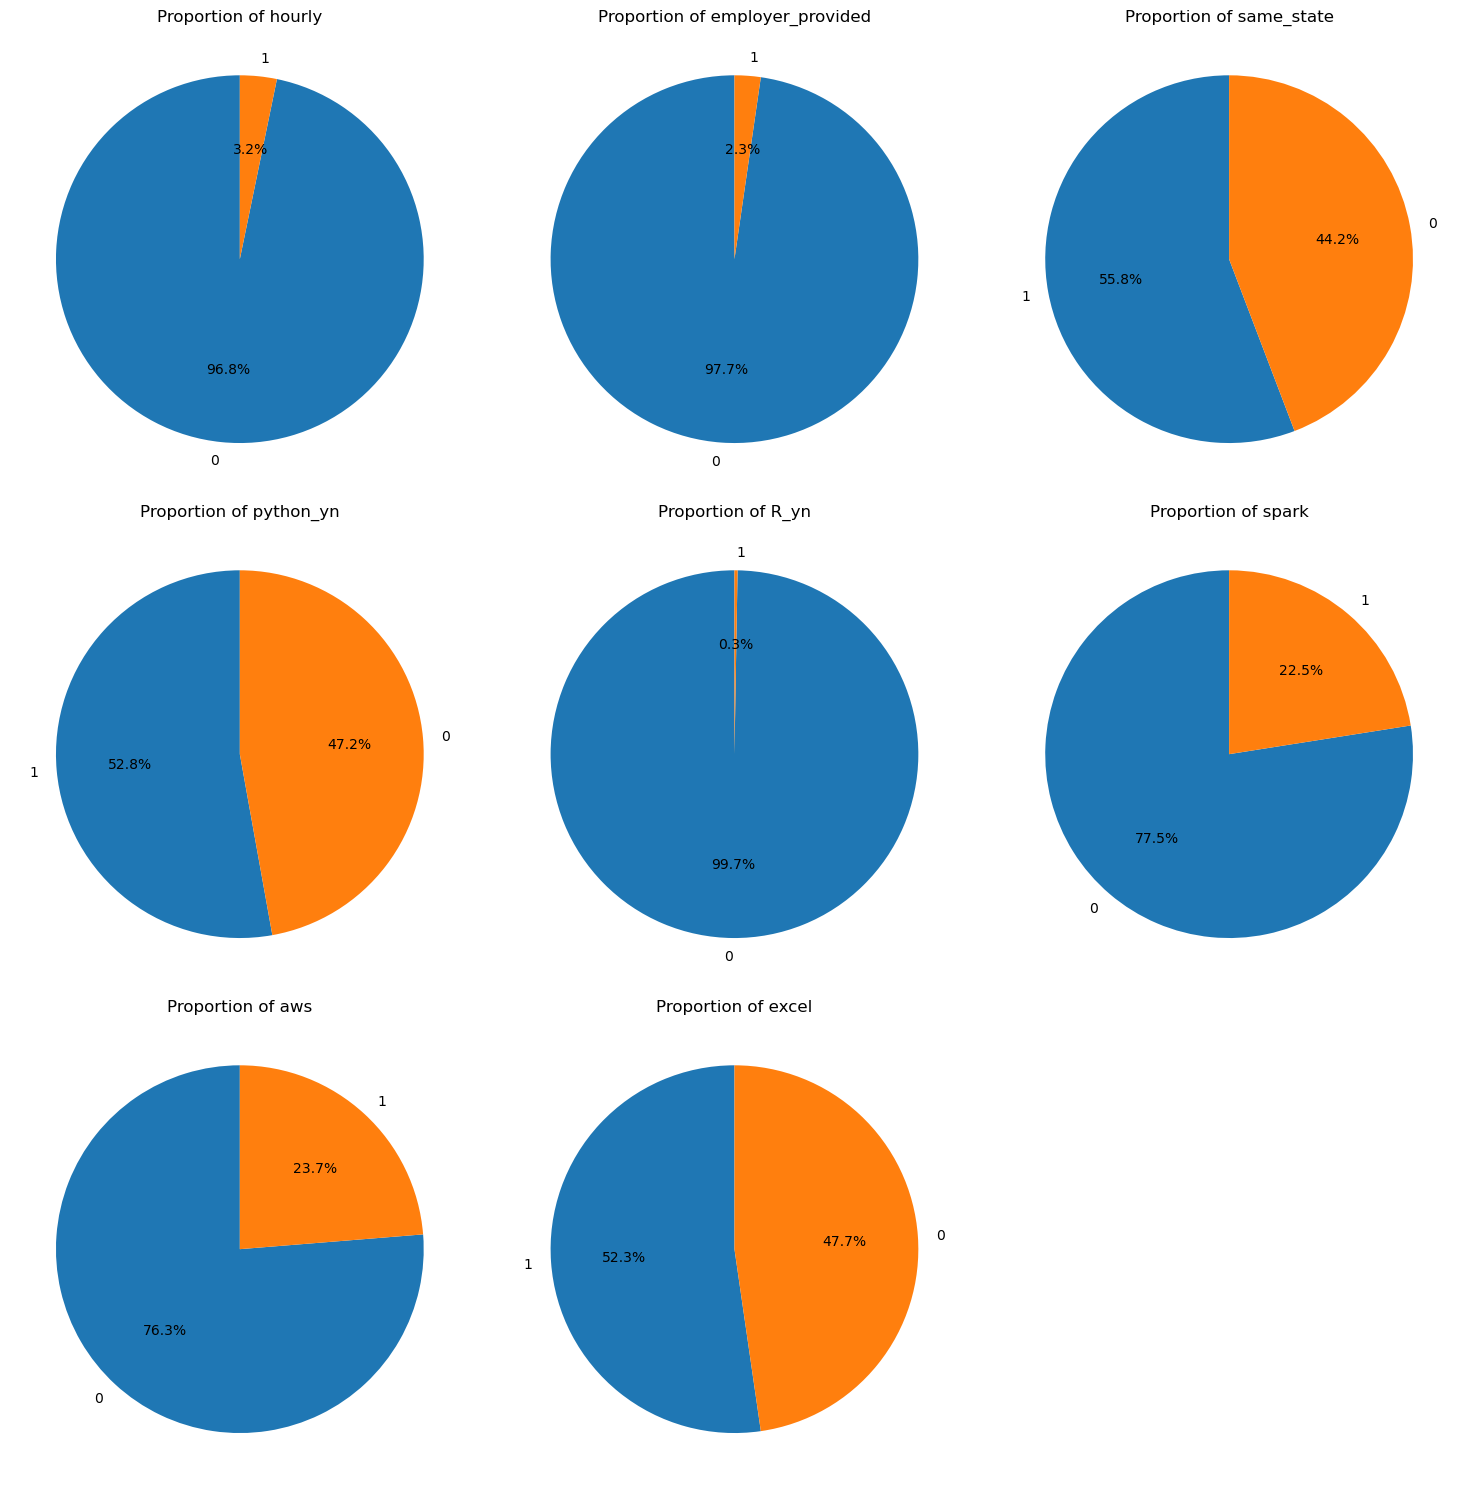

In [876]:
# List of features with only 2 unique values
binary_features = ['hourly', 'employer_provided', 'same_state', 'python_yn', 'R_yn', 'spark', 'aws', 'excel']

# Determine the number of rows and columns for subplots
num_features = len(binary_features)
num_cols = 3  # Adjust this number based on how many pie charts you want per row
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each pie chart
for i, feature in enumerate(binary_features):
    ax = axes[i]
    df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax)
    ax.set_title(f'Proportion of {feature}')
    ax.set_ylabel('')  # Hide y-label for pie charts

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Distribution of Quantitative Features

Plots the distribution of quantitative features using histograms with Kernel Density Estimation (KDE). This helps to understand the spread and central tendencies of these numerical features.


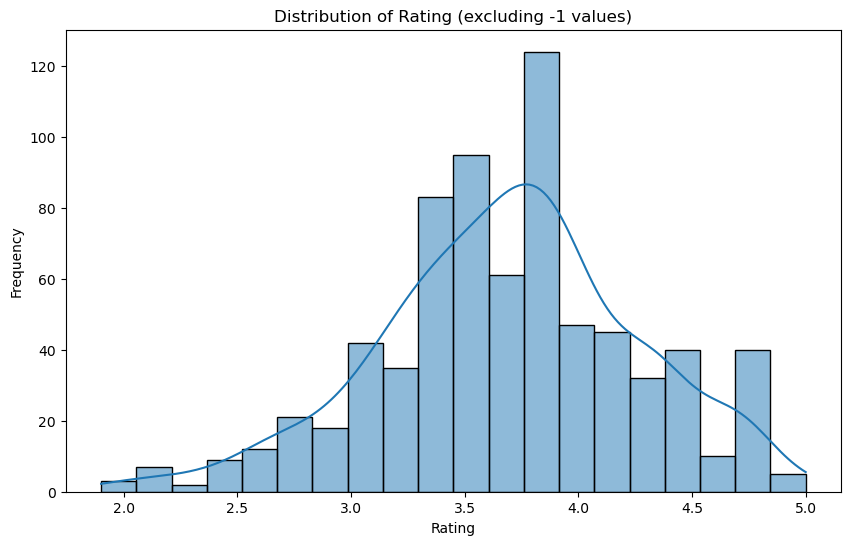

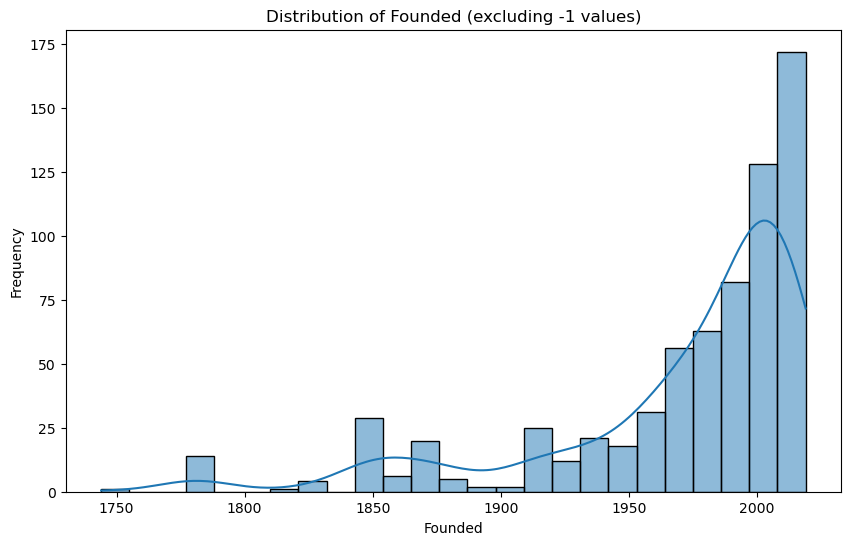

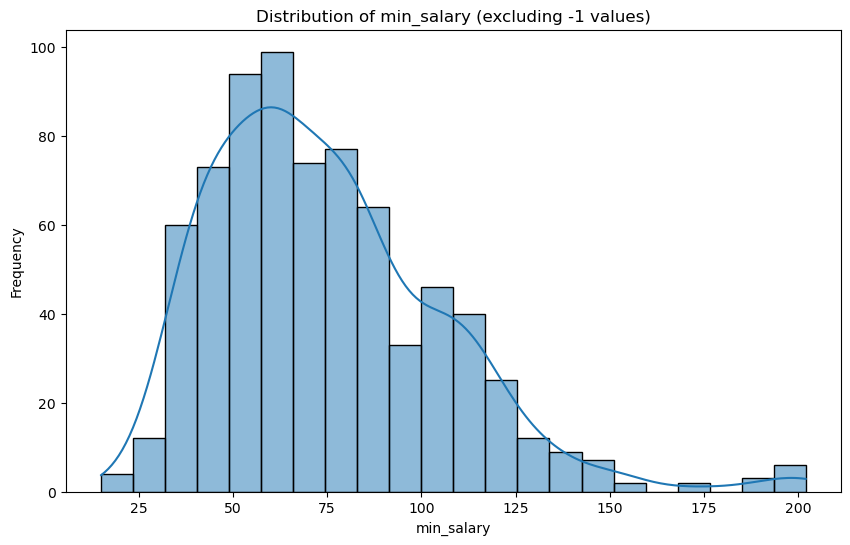

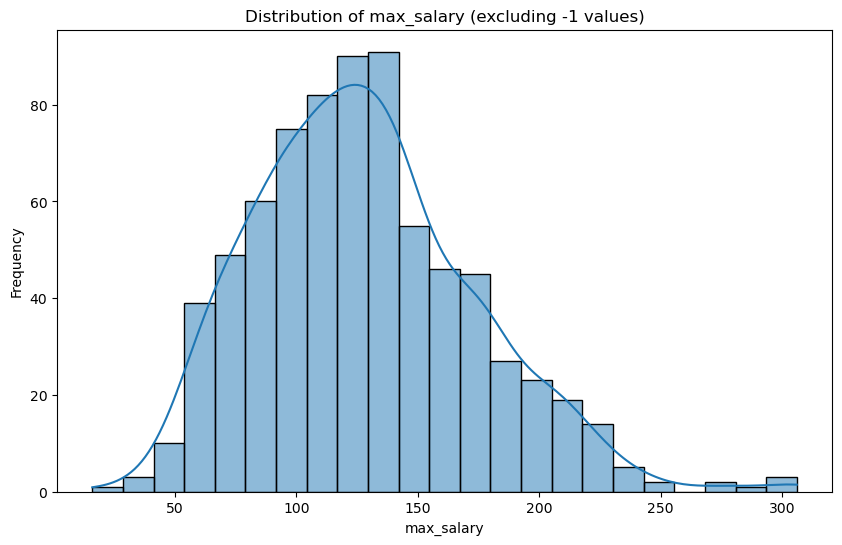

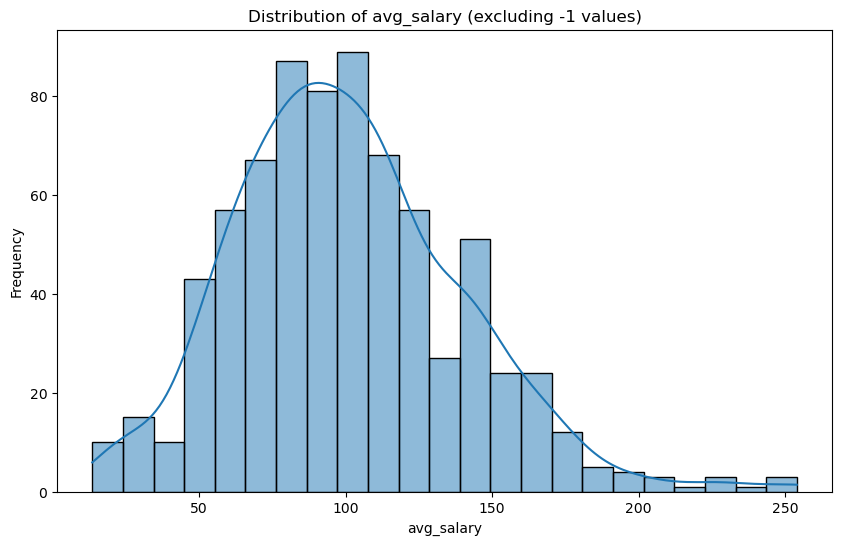

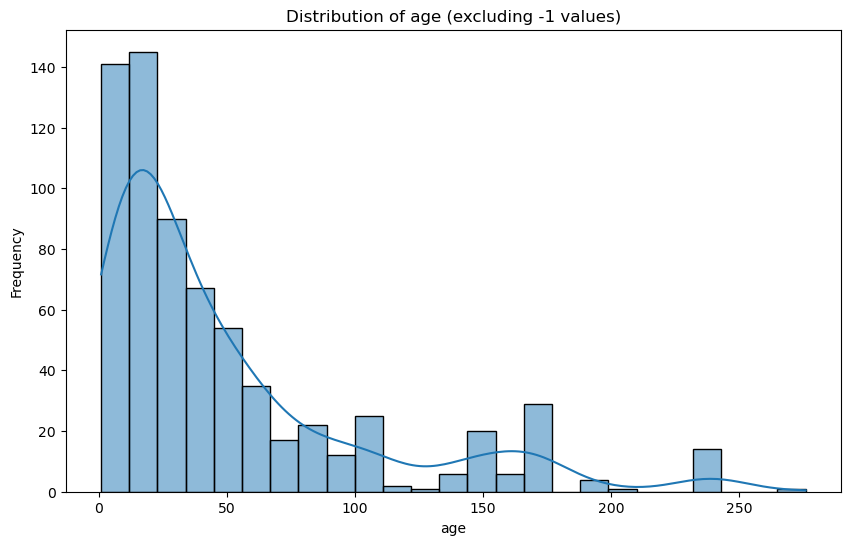

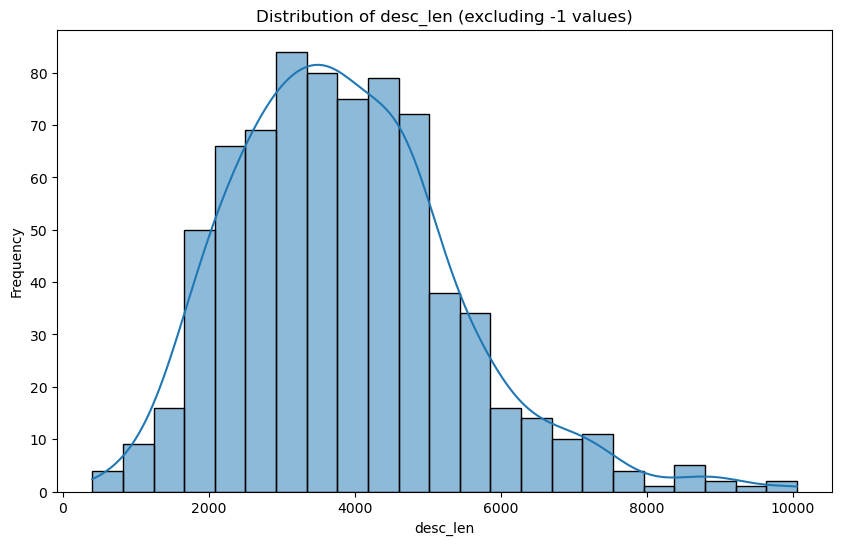

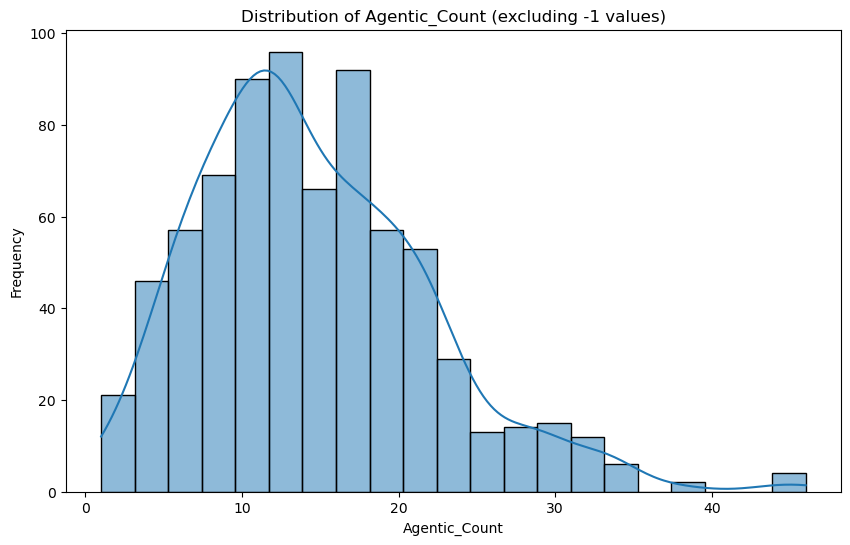

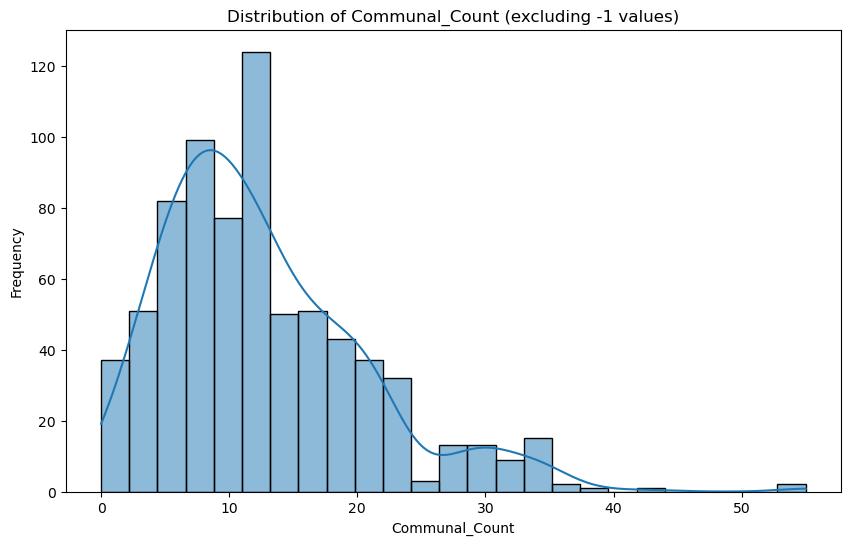

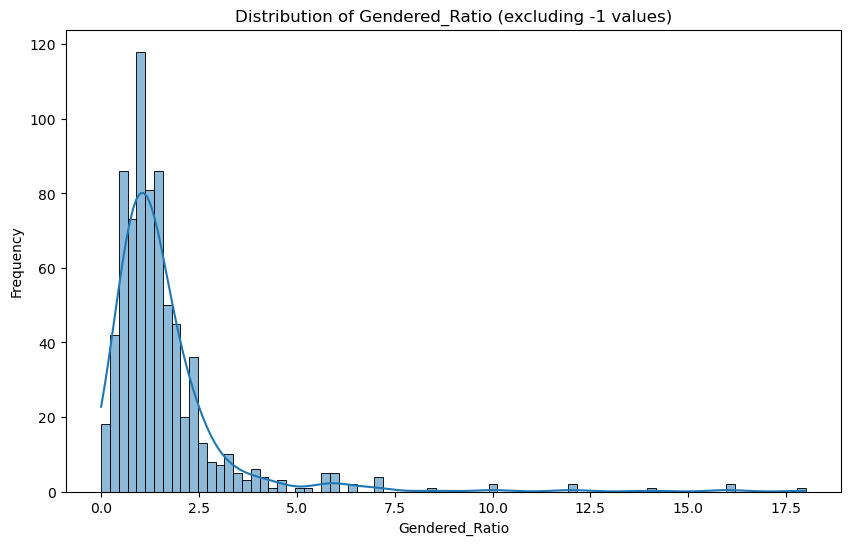

In [877]:
quantitative_features = [
    'Rating', 'Founded', 'min_salary', 
    'max_salary', 'avg_salary', 'age', 
    'desc_len', 
    'Agentic_Count', 'Communal_Count', 'Gendered_Ratio'
]

# Plot distribution of each quantitative feature
for feature in quantitative_features:
    plt.figure(figsize=(10, 6))
    
    # Exclude values that are -1
    data_to_plot = df[df[feature] != -1][feature]
    
    # Plot histogram
    sns.histplot(data_to_plot, kde=True)
    plt.title(f'Distribution of {feature} (excluding -1 values)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


#### Summarizes/Combine All Quantitative Distributions

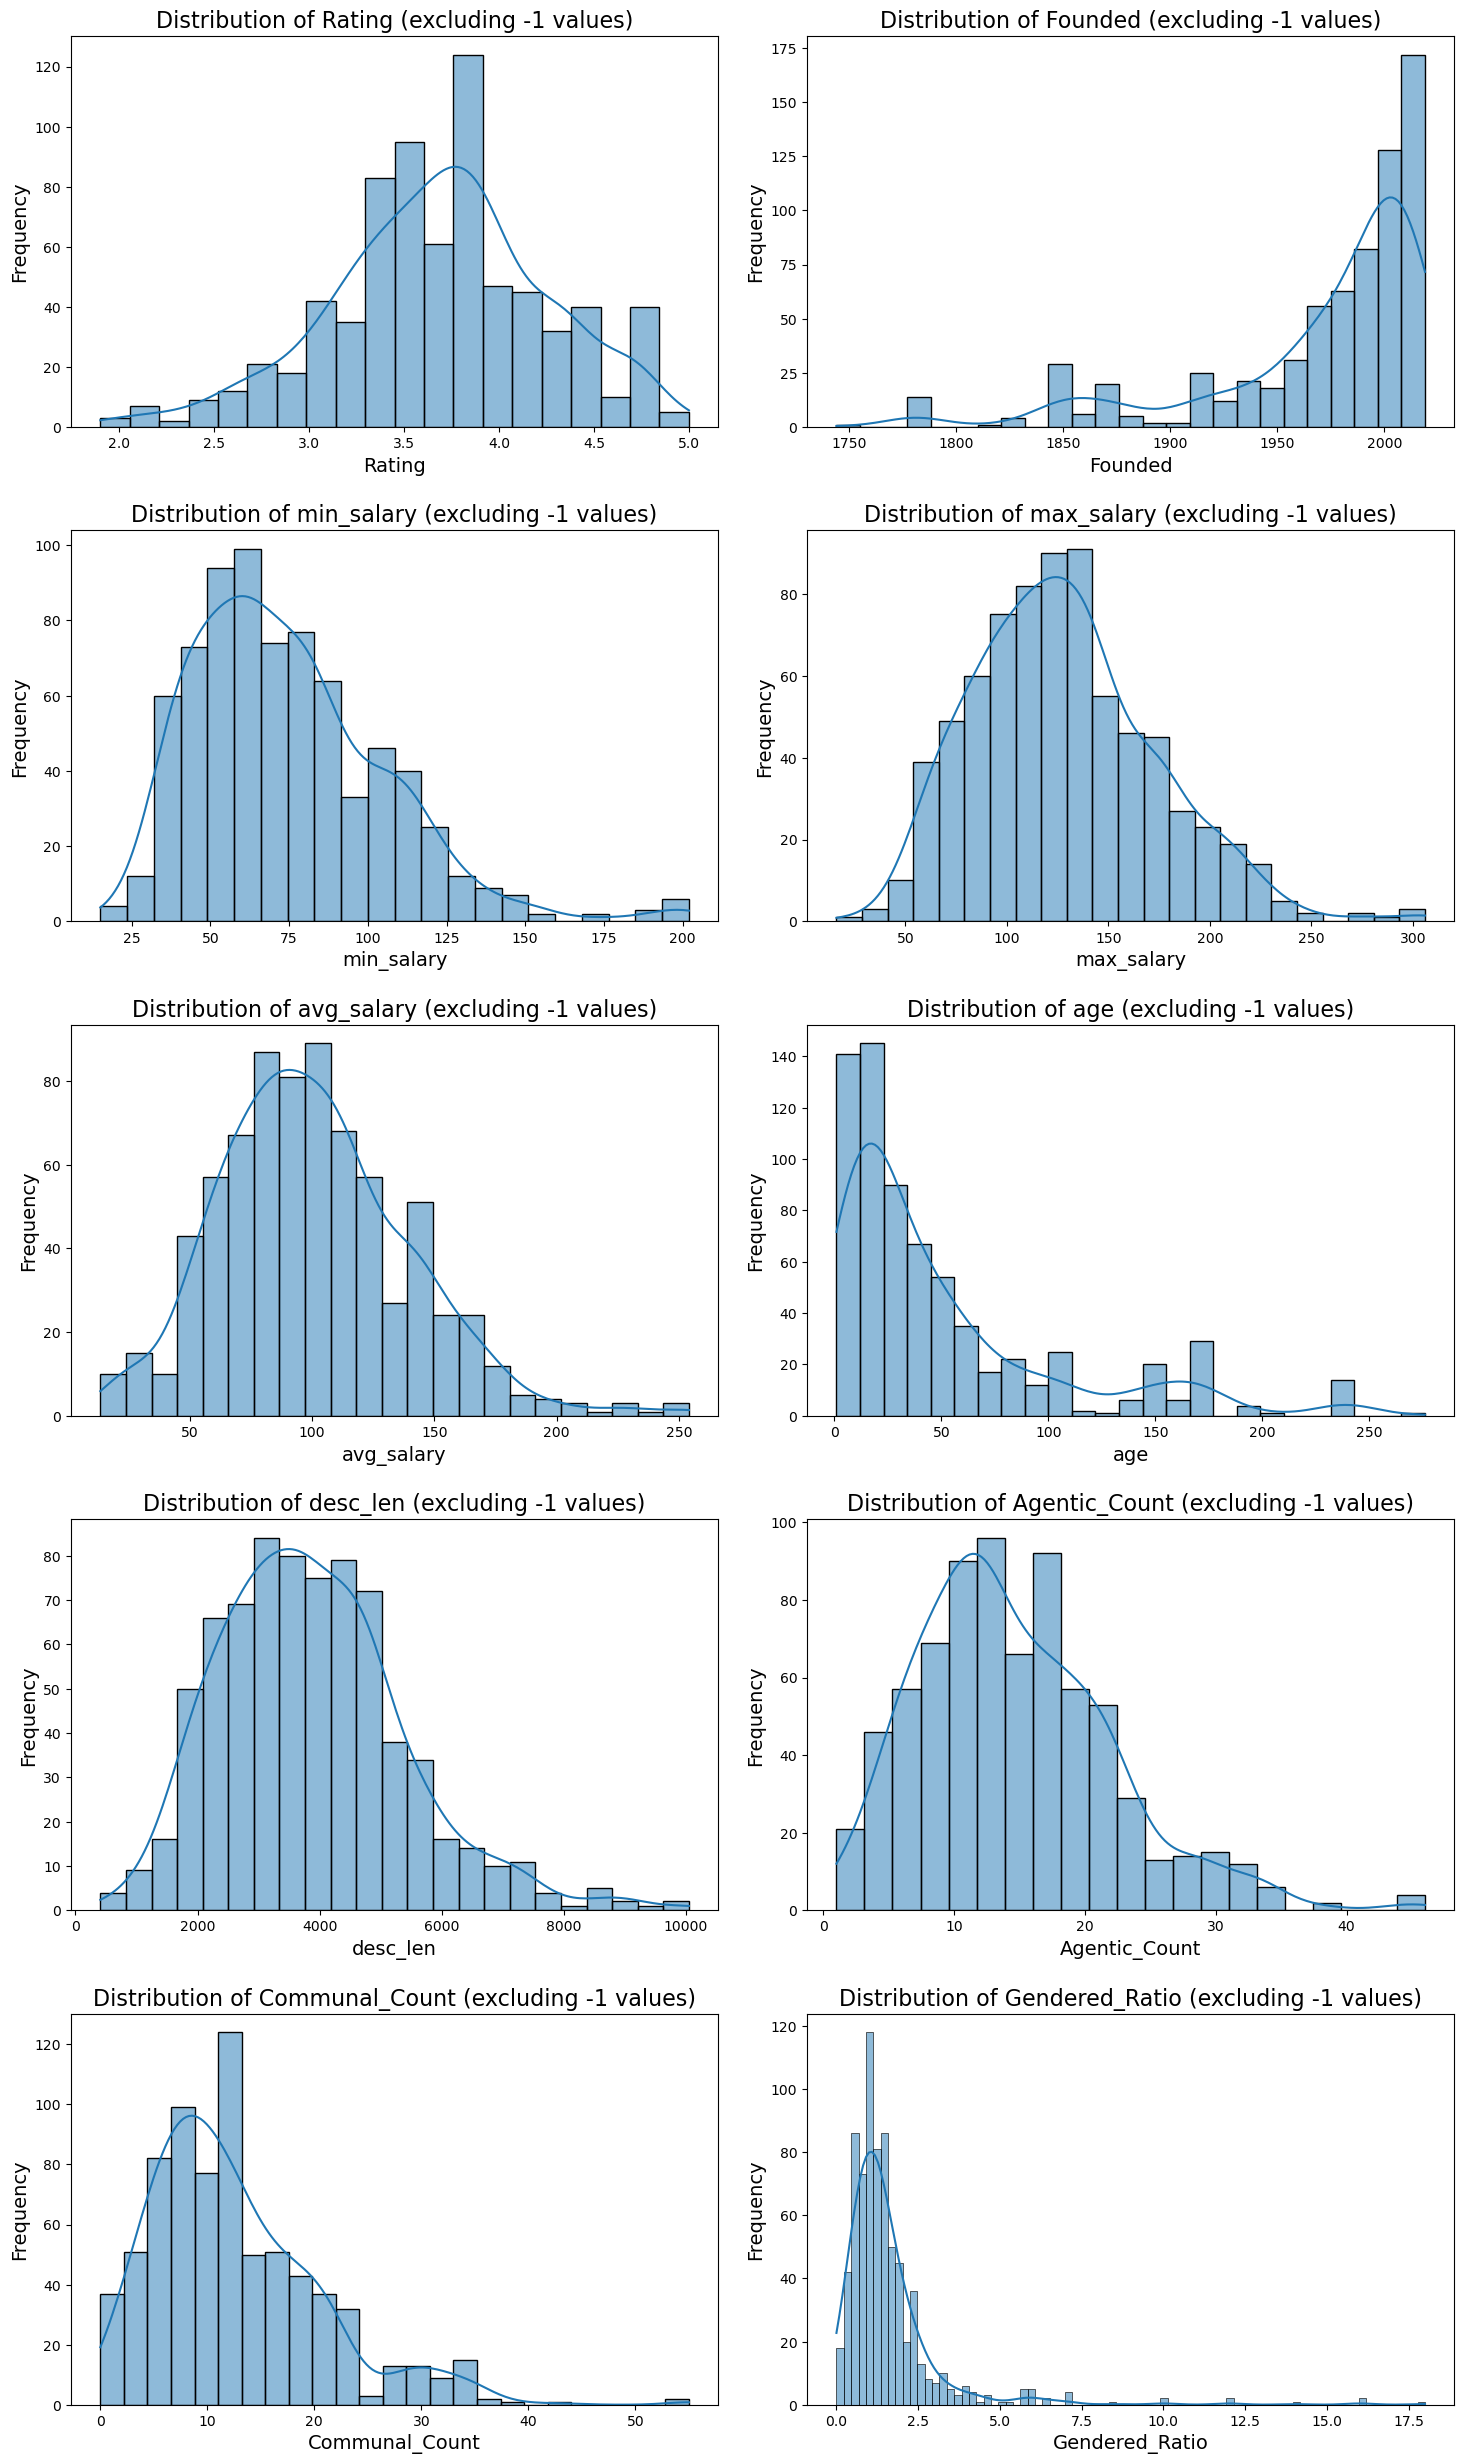

In [878]:
# List of quantitative features to analyze
quantitative_features = [
    'Rating', 'Founded', 'min_salary', 
    'max_salary', 'avg_salary', 'age', 
    'desc_len', 
    'Agentic_Count', 'Communal_Count', 'Gendered_Ratio'
]

# Number of features
n_features = len(quantitative_features)

# Determine the grid size for subplots
ncols = 2  # Number of columns in the grid
nrows = (n_features + ncols - 1) // ncols  # Calculate the number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot distribution of each quantitative feature
for i, feature in enumerate(quantitative_features):
    # Exclude values that are -1
    data_to_plot = df[df[feature] != -1][feature]
    
    # Plot histogram
    sns.histplot(data_to_plot, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} (excluding -1 values)', fontsize=16)
    axes[i].set_xlabel(feature, fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)
    
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout(pad=2.0)  # Adjust padding as needed

# Show the combined plot
plt.show()


### Correlation Heatmap

Calculates and visualizes the correlation matrix for selected features. The heatmap shows the relationships between these features, highlighting any strong correlations.


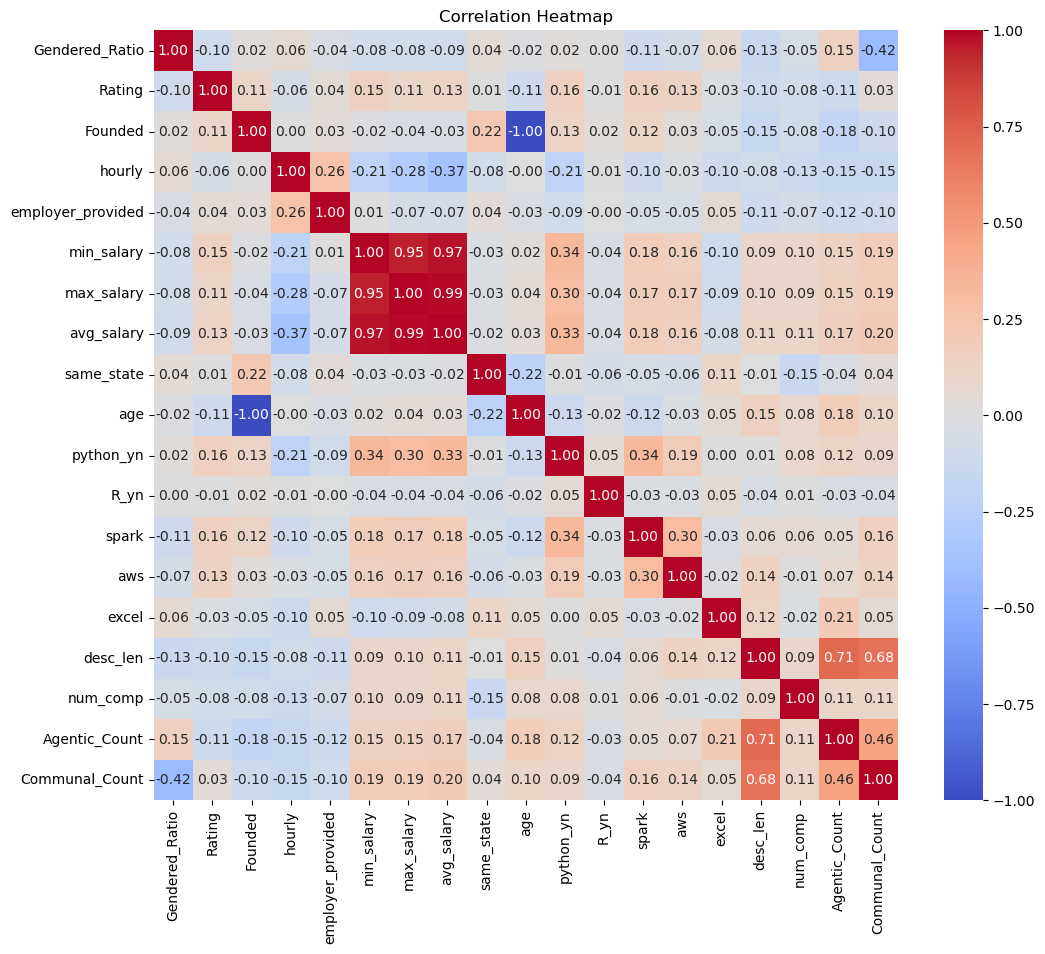

In [879]:

# List of numerical columns to include in the correlation heatmap
numerical_columns = [
    'Gendered_Ratio','Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary', 
    'max_salary', 'avg_salary', 'same_state', 'age', 'python_yn', 
    'R_yn', 'spark', 'aws', 'excel', 'desc_len', 'num_comp', 
    'Agentic_Count', 'Communal_Count'
]

# Filter the DataFrame to include only the numerical columns
df_numerical = df[numerical_columns]

# Exclude rows where any numerical column has the value -1
df_numerical = df_numerical[~(df_numerical == -1).any(axis=1)]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



----

# Sentiment Analysis

In [880]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from textblob import TextBlob


In [881]:

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

# Create a new column for sentiment
df['Sentiment'] = df['Lemmatized_Description'].apply(get_sentiment)


A correlation of -0.0506 means that there is a slight negative relationship between sentiment and gender bias, but the strength of this relationship is very weak. This implies that sentiment is not a strong predictor of gender bias in job descriptions on its own.

### Encode Categorical Variables
Uses Label Encoding to convert categorical features into numerical format. This encoding is essential for feeding these features into machine learning models.


In [882]:
# List of categorical features to encode
categorical_features = [
    'job_state', 'headquarters_state', 'Type of ownership', 'Industry',
    'Sector', 'job_simp', 'seniority', 'num_comp','Sentiment'
]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical feature
for feature in categorical_features:
    df[f'{feature}_encoded'] = label_encoder.fit_transform(df[feature].astype(str))

print(df[[f'{feature}_encoded' for feature in categorical_features]].head())



   job_state_encoded  headquarters_state_encoded  Type of ownership_encoded  \
0                 24                           6                          2   
1                 17                          24                          7   
2                  7                          12                          2   
3                 35                          45                          4   
4                 25                          31                          2   

   Industry_encoded  Sector_encoded  job_simp_encoded  seniority_encoded  \
0                 3               2                 2                  1   
1                28              12                 2                  1   
2                46               6                 2                  1   
3                18              19                 2                  1   
4                 2               6                 2                  1   

   num_comp_encoded  Sentiment_encoded  
0                 0        

----

### Creating 'Gender Bias' Target Column

Creates a binary 'Gender Bias' target column based on statistical measures such as the mean or standard deviation to determine a dynamic threshold.


In [883]:

# Calculate the ratio of Agentic_Count to Communal_Count
df['Ratio'] = (df['Agentic_Count'] + 1e-10) / (df['Communal_Count'] + 1e-10)  # Add small value to avoid division by zero

# Calculate mean and standard deviation of the ratio
mean_ratio = df['Ratio'].mean()
std_ratio = df['Ratio'].std()

# Define a threshold based on mean + standard deviation
bias_threshold = mean_ratio + std_ratio

# Create 'Gender_Bias' target column
df['Gender_Bias'] = np.where(df['Ratio'] > bias_threshold, 1, 0)

# Check the distribution of the target column
print(df['Gender_Bias'].value_counts())



Gender_Bias
0    734
1      8
Name: count, dtype: int64


The distribution of your Gender_Bias target column indicates a severe class imbalance, with 734 instances of class 0 (no bias) and only 8 instances of class 1 (bias). This imbalance could impact the performance of any model you build, as it might be biased towards predicting the majority class (class 0).

Resampling Techniques

Oversampling: Increase the number of minority class instances (class 1) using techniques like SMOTE (Synthetic Minority Over-sampling Technique).

Undersampling: Reduce the number of majority class instances (class 0) to balance the classes.

## Updating Threshold to Quartiles per RF.ipynb

In [884]:
# Calculate the ratio of Agentic_Count to Communal_Count
df['Ratio'] = (df['Agentic_Count'] + 1e-10) / (df['Communal_Count'] + 1e-10)  # Add small value to avoid division by zero

# Define a threshold based on quartiles (e.g., 1.2404)
threshold = 1.2403846153821654

# Create 'Gender_Bias' target column using the defined threshold
df['Gender_Bias'] = np.where(df['Ratio'] > threshold, 1, 0)

# Check the distribution of the target column
print(df['Gender_Bias'].value_counts())

Gender_Bias
1    371
0    371
Name: count, dtype: int64


### Handle Class Imbalance SMOTE (Synthetic Minority Over-sampling Technique)

In [885]:
# Define the target and features
target = 'Gender_Bias'

# List of numerical features
numerical_features = [
    'Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary', 
    'max_salary', 'avg_salary', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 
    'aws', 'excel', 'desc_len', 'num_comp', 'Agentic_Count', 'Communal_Count', 
    'job_state_encoded', 'headquarters_state_encoded', 
    'Type of ownership_encoded', 'Industry_encoded', 'Sector_encoded', 
    'job_simp_encoded', 'seniority_encoded', 'num_comp_encoded','Sentiment_encoded'
]

# Split the data into features and target
X = df[numerical_features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print("Class distribution after SMOTE:")
print(y_train_res.value_counts())

# X_train_res and y_train_res can now be used for training your model


Class distribution after SMOTE:
Gender_Bias
1    300
0    300
Name: count, dtype: int64


The SMOTE process has balanced the classes, with an equal number of instances for both Gender_Bias = 1 and Gender_Bias = 0.

Analysis
Threshold 0.8195:

This threshold is the lowest, resulting in a higher number of samples classified as 1 (Gender_Bias=1). This threshold will be more lenient, classifying more samples as biased.
Threshold 1.2404:

This threshold provides a balanced split between the two classes (371 samples each). It could be useful if you aim for a more balanced dataset.
Threshold 1.8462:

This threshold is the highest, resulting in a higher number of samples classified as 0 (Gender_Bias=0). This threshold will be more stringent, classifying fewer samples as biased.

## Visualization After Encoding

In [886]:
# List of numerical columns to include in the correlation heatmap
numerical_columns = [
    'Gender_Bias','Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary', 
    'max_salary', 'avg_salary', 'same_state', 'age', 'python_yn', 
    'R_yn', 'spark', 'aws', 'excel', 'desc_len', 'num_comp', 
    'Agentic_Count', 'Communal_Count', 'Gendered_Ratio',
    'job_state_encoded', 'headquarters_state_encoded', 'Type of ownership_encoded',
    'Industry_encoded', 'Sector_encoded', 'job_simp_encoded', 
    'seniority_encoded', 'num_comp_encoded','Sentiment_encoded'
]

# Filter the DataFrame to include only the numerical columns
df_numerical = df[numerical_columns]


# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Extract correlations with Gender_Bias
Gender_Bias_correlations = correlation_matrix['Gender_Bias']

# Exclude correlation with itself
Gender_Bias_correlations = Gender_Bias_correlations.drop(['Gender_Bias'])

# Sort the correlations from most to least correlated
sorted_Gender_Bias_correlations = Gender_Bias_correlations.sort_values(ascending=False)

# Display the sorted correlations
print(sorted_Gender_Bias_correlations)

Gendered_Ratio                4.798697e-01
Agentic_Count                 2.732919e-01
headquarters_state_encoded    9.092399e-02
python_yn                     6.479391e-02
job_state_encoded             5.979303e-02
excel                         5.396504e-02
seniority_encoded             5.257856e-02
Industry_encoded              5.122344e-02
hourly                        3.047138e-02
job_simp_encoded              2.083061e-02
aws                           1.901020e-02
employer_provided             9.007547e-03
Type of ownership_encoded     5.980002e-03
R_yn                          1.875975e-17
age                          -1.161071e-02
num_comp_encoded             -2.727946e-02
num_comp                     -2.727946e-02
Rating                       -3.063472e-02
Founded                      -5.359114e-02
Sentiment_encoded            -6.022151e-02
max_salary                   -6.361304e-02
min_salary                   -6.512246e-02
avg_salary                   -6.558104e-02
spark      

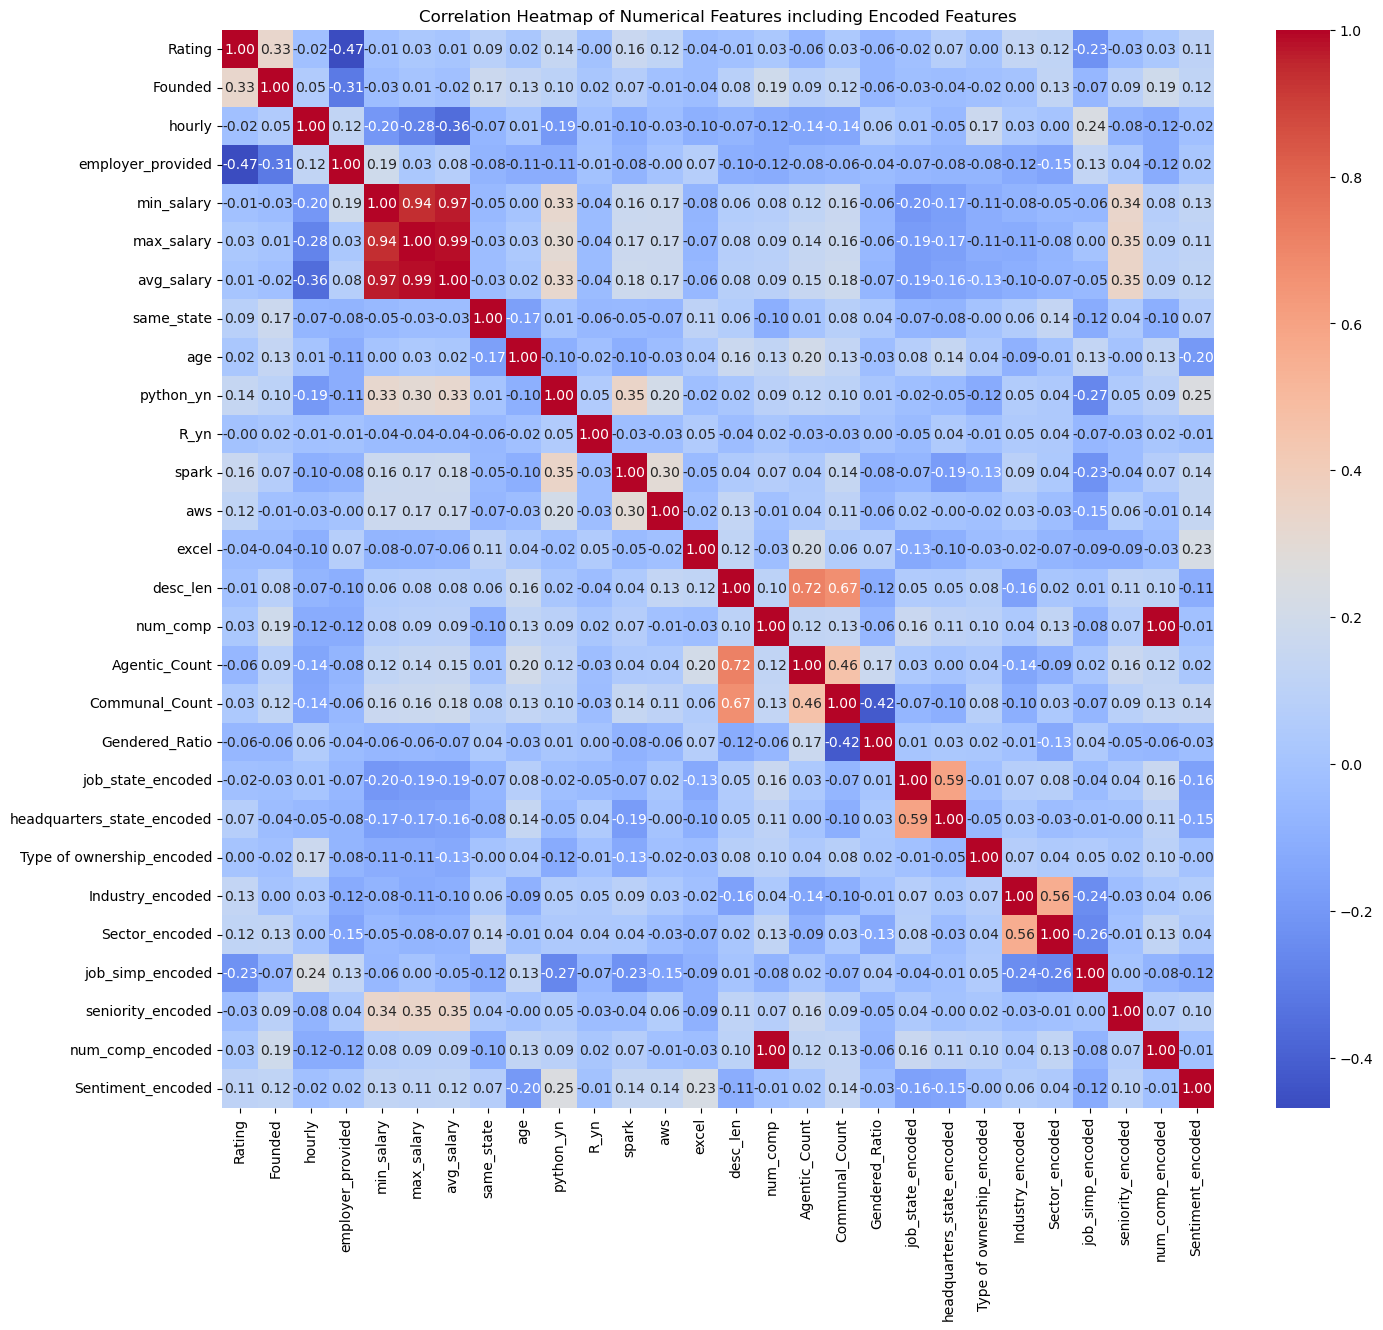

In [887]:
# List of numerical columns to include in the correlation heatmap
numerical_columns = [
    'Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary', 
    'max_salary', 'avg_salary', 'same_state', 'age', 'python_yn', 
    'R_yn', 'spark', 'aws', 'excel', 'desc_len', 'num_comp', 
    'Agentic_Count', 'Communal_Count', 'Gendered_Ratio', 
    'job_state_encoded', 'headquarters_state_encoded', 'Type of ownership_encoded',
    'Industry_encoded', 'Sector_encoded', 'job_simp_encoded', 
    'seniority_encoded', 'num_comp_encoded','Sentiment_encoded'
]

# Filter the DataFrame to include only the numerical columns
df_numerical = df[numerical_columns]


# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features including Encoded Features')
plt.show()

---

# Threshold Investigation

In [888]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores[np.isnan(f1_scores)] = 0  # Replace NaNs with zeros

# Find the threshold that gives the highest F1 score
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]
print(f"Best Threshold (F1 score): {best_threshold}")


NameError: name 'y_pred_proba' is not defined

In [ ]:
# Apply the best threshold to get new predictions
y_pred_adjusted = (y_pred_proba >= best_threshold).astype(int)

# Evaluate the model with the new threshold
print("Accuracy with adjusted threshold:", accuracy_score(y_test, y_pred_adjusted))
print("Confusion Matrix with adjusted threshold:")
print(confusion_matrix(y_test, y_pred_adjusted))
print("Classification Report with adjusted threshold:")
print(classification_report(y_test, y_pred_adjusted))


In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores[np.isnan(f1_scores)] = 0  # Replace NaNs with zeros

# Find the threshold that gives the highest F1 score
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]
print(f"Best Threshold (F1 score): {best_threshold}")


In [ ]:
# Apply the best threshold to get new predictions
y_pred_adjusted = (y_pred_proba >= best_threshold).astype(int)

# Evaluate the model with the new threshold
print("Accuracy with adjusted threshold:", accuracy_score(y_test, y_pred_adjusted))
print("Confusion Matrix with adjusted threshold:")
print(confusion_matrix(y_test, y_pred_adjusted))
print("Classification Report with adjusted threshold:")
print(classification_report(y_test, y_pred_adjusted))


## THRESHOLD based on Quartiles


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('model_data.csv')

# Calculate the ratio of Agentic_Count to Communal_Count
df['Ratio'] = (df['Agentic_Count'] + 1e-10) / (df['Communal_Count'] + 1e-10)  # Add small value to avoid division by zero

# Compute quartiles of the 'Ratio' feature
quartiles = np.percentile(df['Ratio'], [25, 50, 75])
print("Quartiles of the Ratio:", quartiles)

# Define thresholds based on quartiles
thresholds = quartiles

# Define features
numerical_features = [
    'desc_len', 'age', 'min_salary', 'avg_salary', 'max_salary', 'Rating', 
    'Founded', 'job_state_encoded', 'num_comp_encoded', 'job_simp_encoded', 
    'headquarters_state_encoded', 'excel', 'Sector_encoded', 'employer_provided', 
    'num_comp', 'Industry_encoded', 'same_state', 'aws', 'Type of ownership_encoded', 
    'seniority_encoded', 'hourly', 'spark', 'python_yn', 'R_yn', 'Sentiment'
]

# Evaluate each threshold
for threshold in thresholds:
    # Create 'Gender_Bias' target column for each threshold
    target_column = f'Gender_Bias_{threshold}'
    df[target_column] = np.where(df['Ratio'] > threshold, 1, 0)
    
    # Prepare the data
    X = df[numerical_features]
    y = df[target_column]
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    
    # Initialize and train the RandomForestClassifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_res, y_train_res)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(f"Evaluation for threshold {threshold}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


- Threshold 0.8195: Best for maximizing recall for the positive class but with slightly lower precision for the negative class.
- Threshold 1.2404: Provides a good balance between precision and recall for both classes.
- Threshold 1.8462: Optimizes precision for the negative class but sacrifices recall for the positive class.


In [ ]:
# Save the DataFrame with encoded columns back to the original CSV file
df.to_csv('model_data.csv', index=False)

In [ ]:
# Additional dataset information
print('Data Set Info')
print(df.info())